# Nato Pontoon with partially filled tanks

## Reference data

Nato pontoon with following 

### Geometry
```
CREATE HULL
Comp pnt1.c
Loc @    0   = 0.05,0.64 2.05,0.64 2.05,0.74 0.05,0.74 0.05,0.64
kLoc @ -0.97  = 0.05,0    2.05,0.0  2.05,0.74 0.05,0.74 0.05,0
Loc @ -4.67  = 0.05,0    2.05,0.0  2.05,0.74 0.05,0.74 0.05,0
spacing .05
Comp pnt2.c
Loc @ -4.77  = 0.05,0    2.05,0.0  2.05,0.74 0.05,0.74 0.05,0
Loc @ -8.87  = 0.05,0    2.05,0.0  2.05,0.74 0.05,0.74 0.05,0
spacing .1
Comp pnt3.c
Loc @  -8.97 = 0.05,0    2.05,0.0  2.05,0.74 0.05,0.74 0.05,0
kLoc @ -12.67 = 0.05,0    2.05,0.0  2.05,0.74 0.05,0.74 0.05,0
Loc @ -13.59 = 0.05,0.64 2.05,0.64 2.05,0.74 0.05,0.74 0.05,0.64
spacing .05
/
```

### Ballast plan

Tank WBT1.S is filled for 50% with fresh water
Tank WBT1.P is filled for 10% with fresh water

### Loads and weight

## Model creation

The hull shape and tank shapes were created in Blender and exported as .obj. The source .blend files are located in this folder. 

See https://www.open-ocean.org/meshing-with-blender/ for some tips and tricks on working with Blender

In [1]:
from DAVE import *
from DAVE.jupyter import *


Equilibrium-core version = 1.03
default resource folders:
C:\Users\beneden\Miniconda3\envs\DAVE\lib\site-packages\DAVE\resources
C:\Users\beneden\DAVE_models
Blender found at: C:\Program Files\Blender Foundation\Blender 2.83\blender.exe
embedWindow(verbose=True): could not load k3d module, try:
> pip install k3d      # and if necessary:
> conda install nodejs


In [2]:
from DAVE.gui import *

In [3]:
s = Scene()

s.new_rigidbody('Nato Ponton')
s['Nato Ponton'].mass = 7.5
s['Nato Ponton'].cog = (6.82, 0.0, 0.38)

# Load geometry
s.new_buoyancy('Buoyancy mesh', parent = 'Nato Ponton')
s['Buoyancy mesh'].trimesh.load_obj(r'Nato ponton.obj')
s['Buoyancy mesh'].density = 1.0


s.new_tank('WBT1.S', parent = 'Nato Ponton')
s['WBT1.S'].trimesh.load_obj(r'nato ponton tank.obj')
s['WBT1.S'].density = 0.985

s.new_tank('WBT1.P', parent = 'Nato Ponton')
s['WBT1.P'].trimesh.load_obj(r'nato ponton tank.obj', offset = (0.0,2.1,0.0))
s['WBT1.P'].density = 0.985

# apply tank fillings
s['WBT1.S'].fill_pct = 50
s['WBT1.P'].fill_pct = 10


# Make points to measure the trim and draft
s.new_point('stern',parent = 'Nato Ponton', position = (0,0,0))
s.new_point('bow',parent = 'Nato Ponton', position = (13.640,0,0));


### Solve the system

Keep the barge fixed in the horizontal plane (X and Y). Release all other 4 degrees of freedom.

In [4]:
s['Nato Ponton'].fixed = (True, True, False, False, False, False)
s.solve_statics();

Solved to 1.1411827927076956e-08.


Picture of the free floating condition

cob = (2.553039621893395, -1.095823498679798, -0.1815466087332506)
cob = (2.3979161259960877, 0.8760794601884401, -0.2571582530352776)


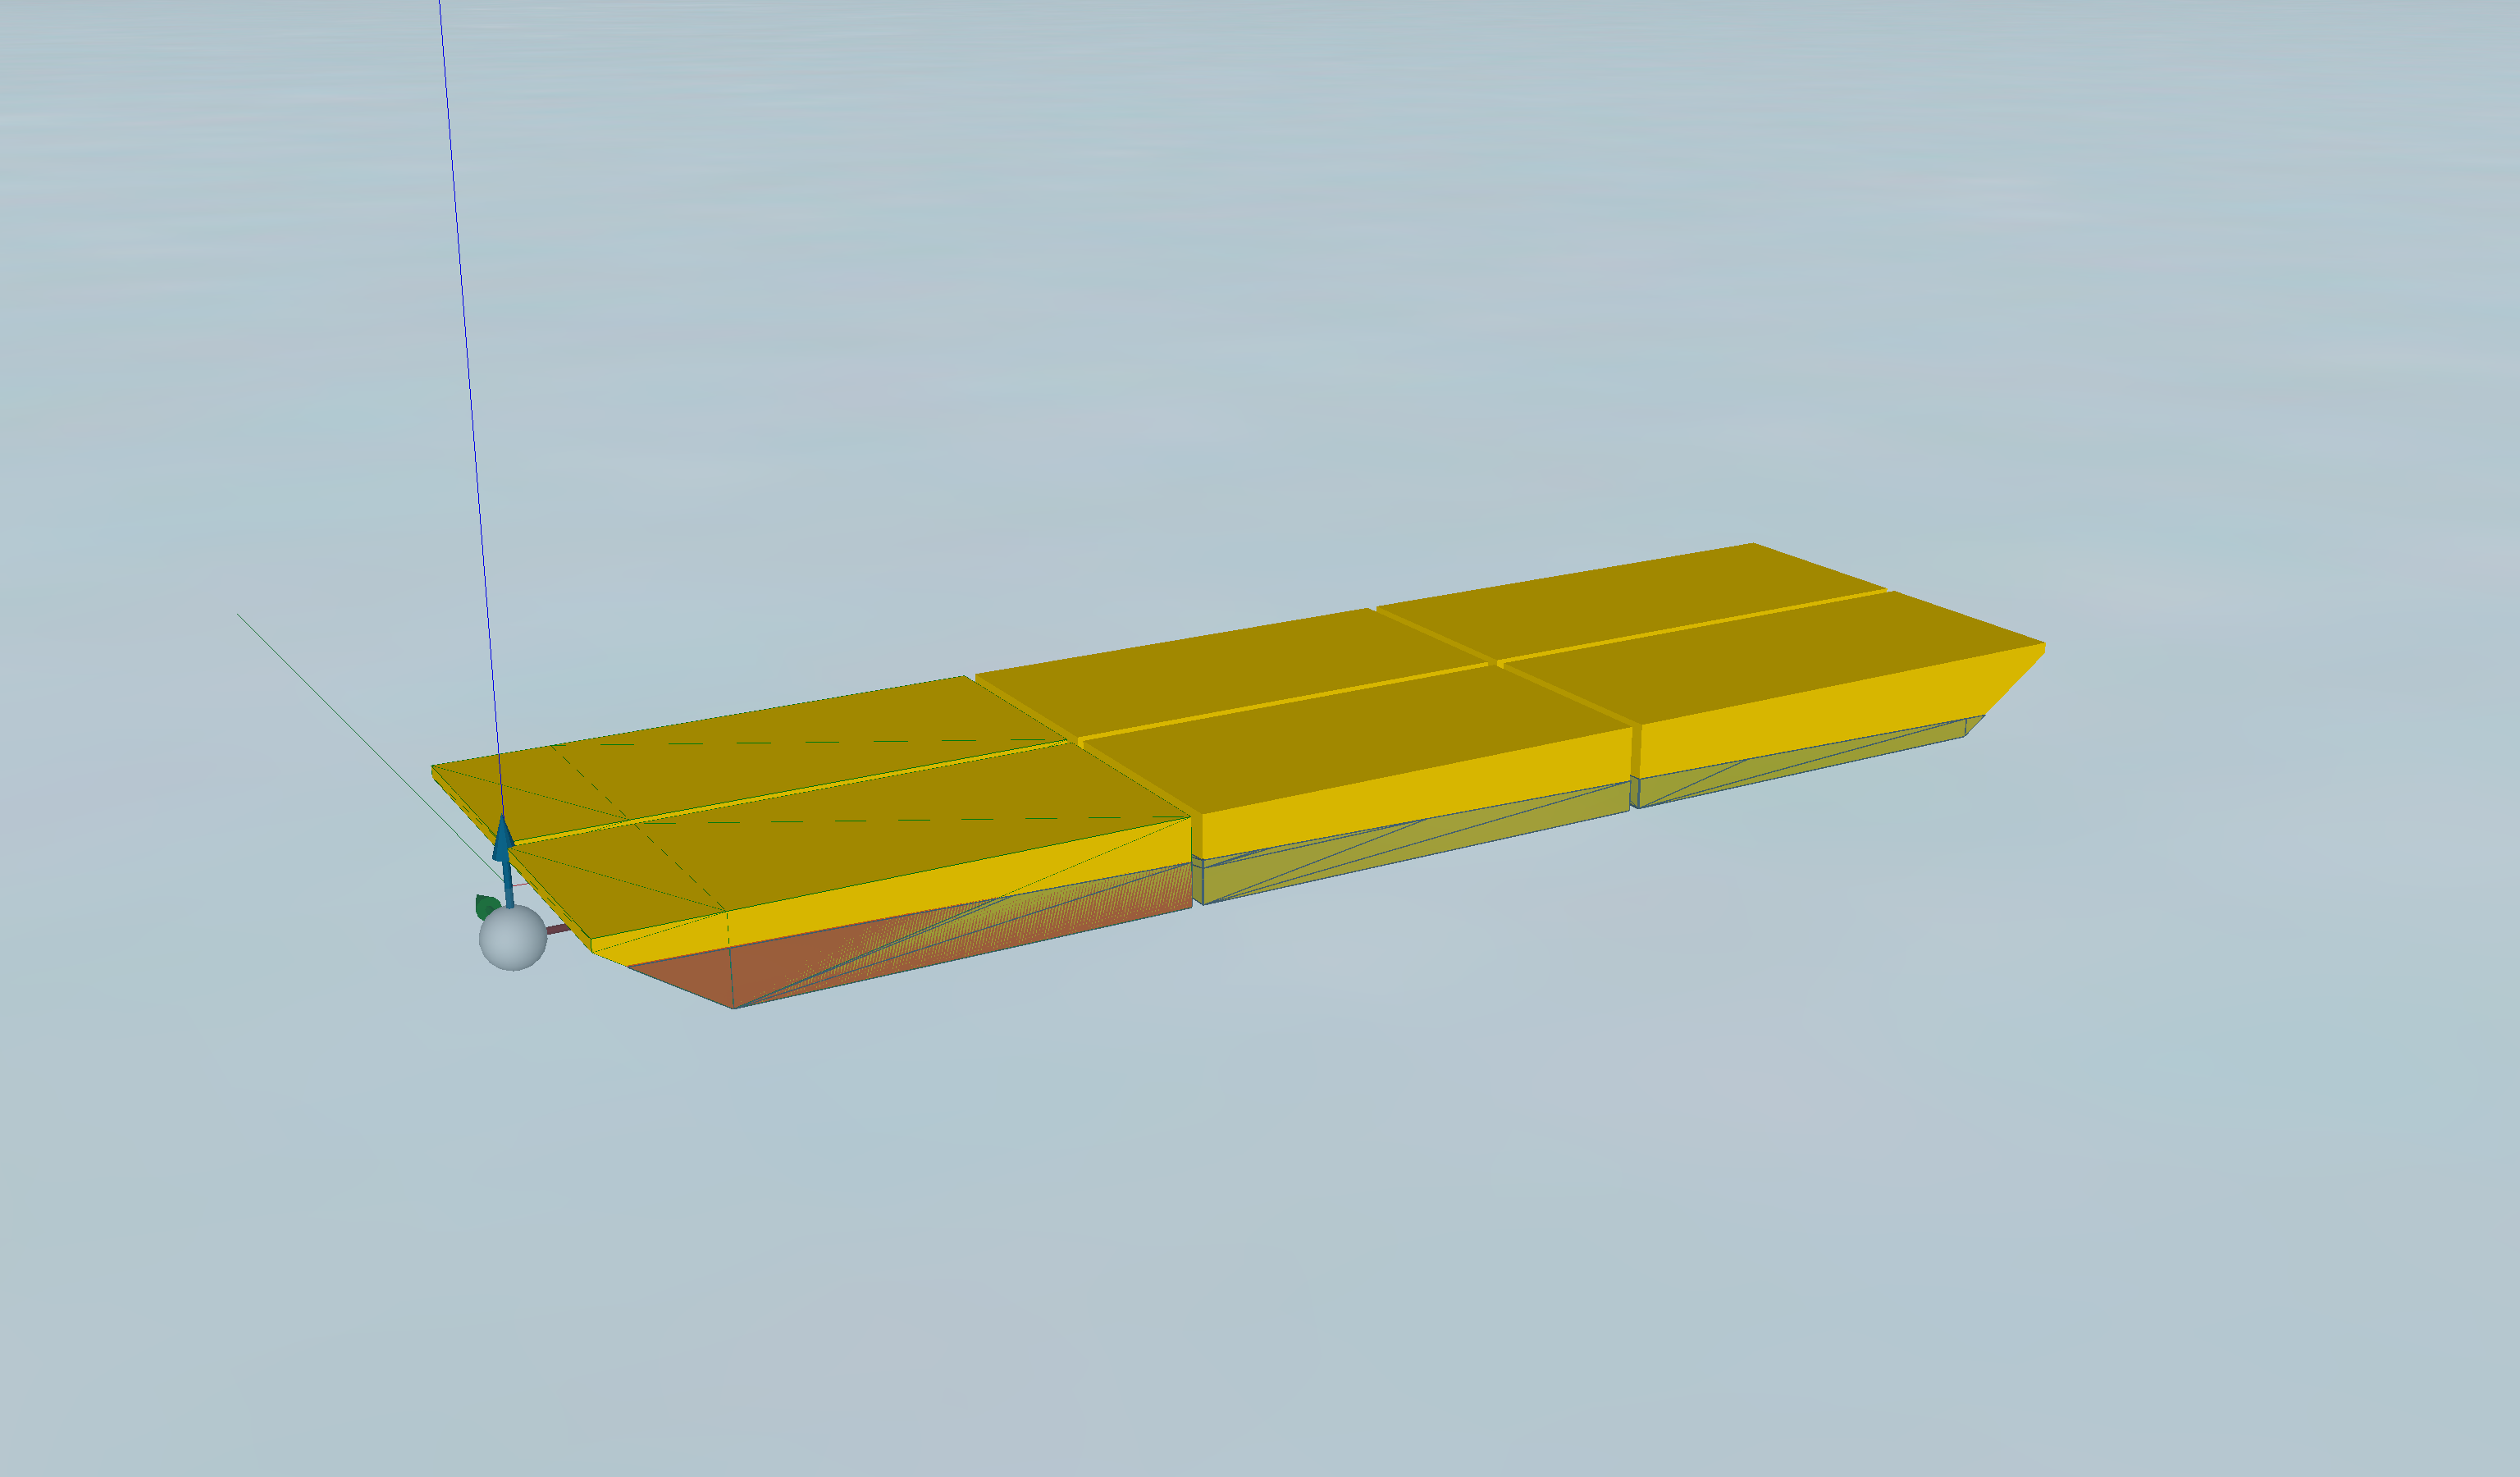

In [5]:
show(s, sea = True, camera_pos = (-5.135726056735549, -19.82949506732169, 6.855145988597425), lookat = (6.796557172523581, 0.545191844349296, 0.01695368985304091), force_normalize = True, force_scale = 1.6, cog_scale = 0.3090056685321995)

And another one with the buoayncy mesh disabled such that we can see the contents of the tanks.

The purple sphere is the CoG of the barge. The blue spheres are the cogs of the tank contents. The white spheres are the points we defined at the stern and bow.

cob = (2.553039621893395, -1.095823498679798, -0.1815466087332506)
cob = (2.3979161259960877, 0.8760794601884401, -0.2571582530352776)


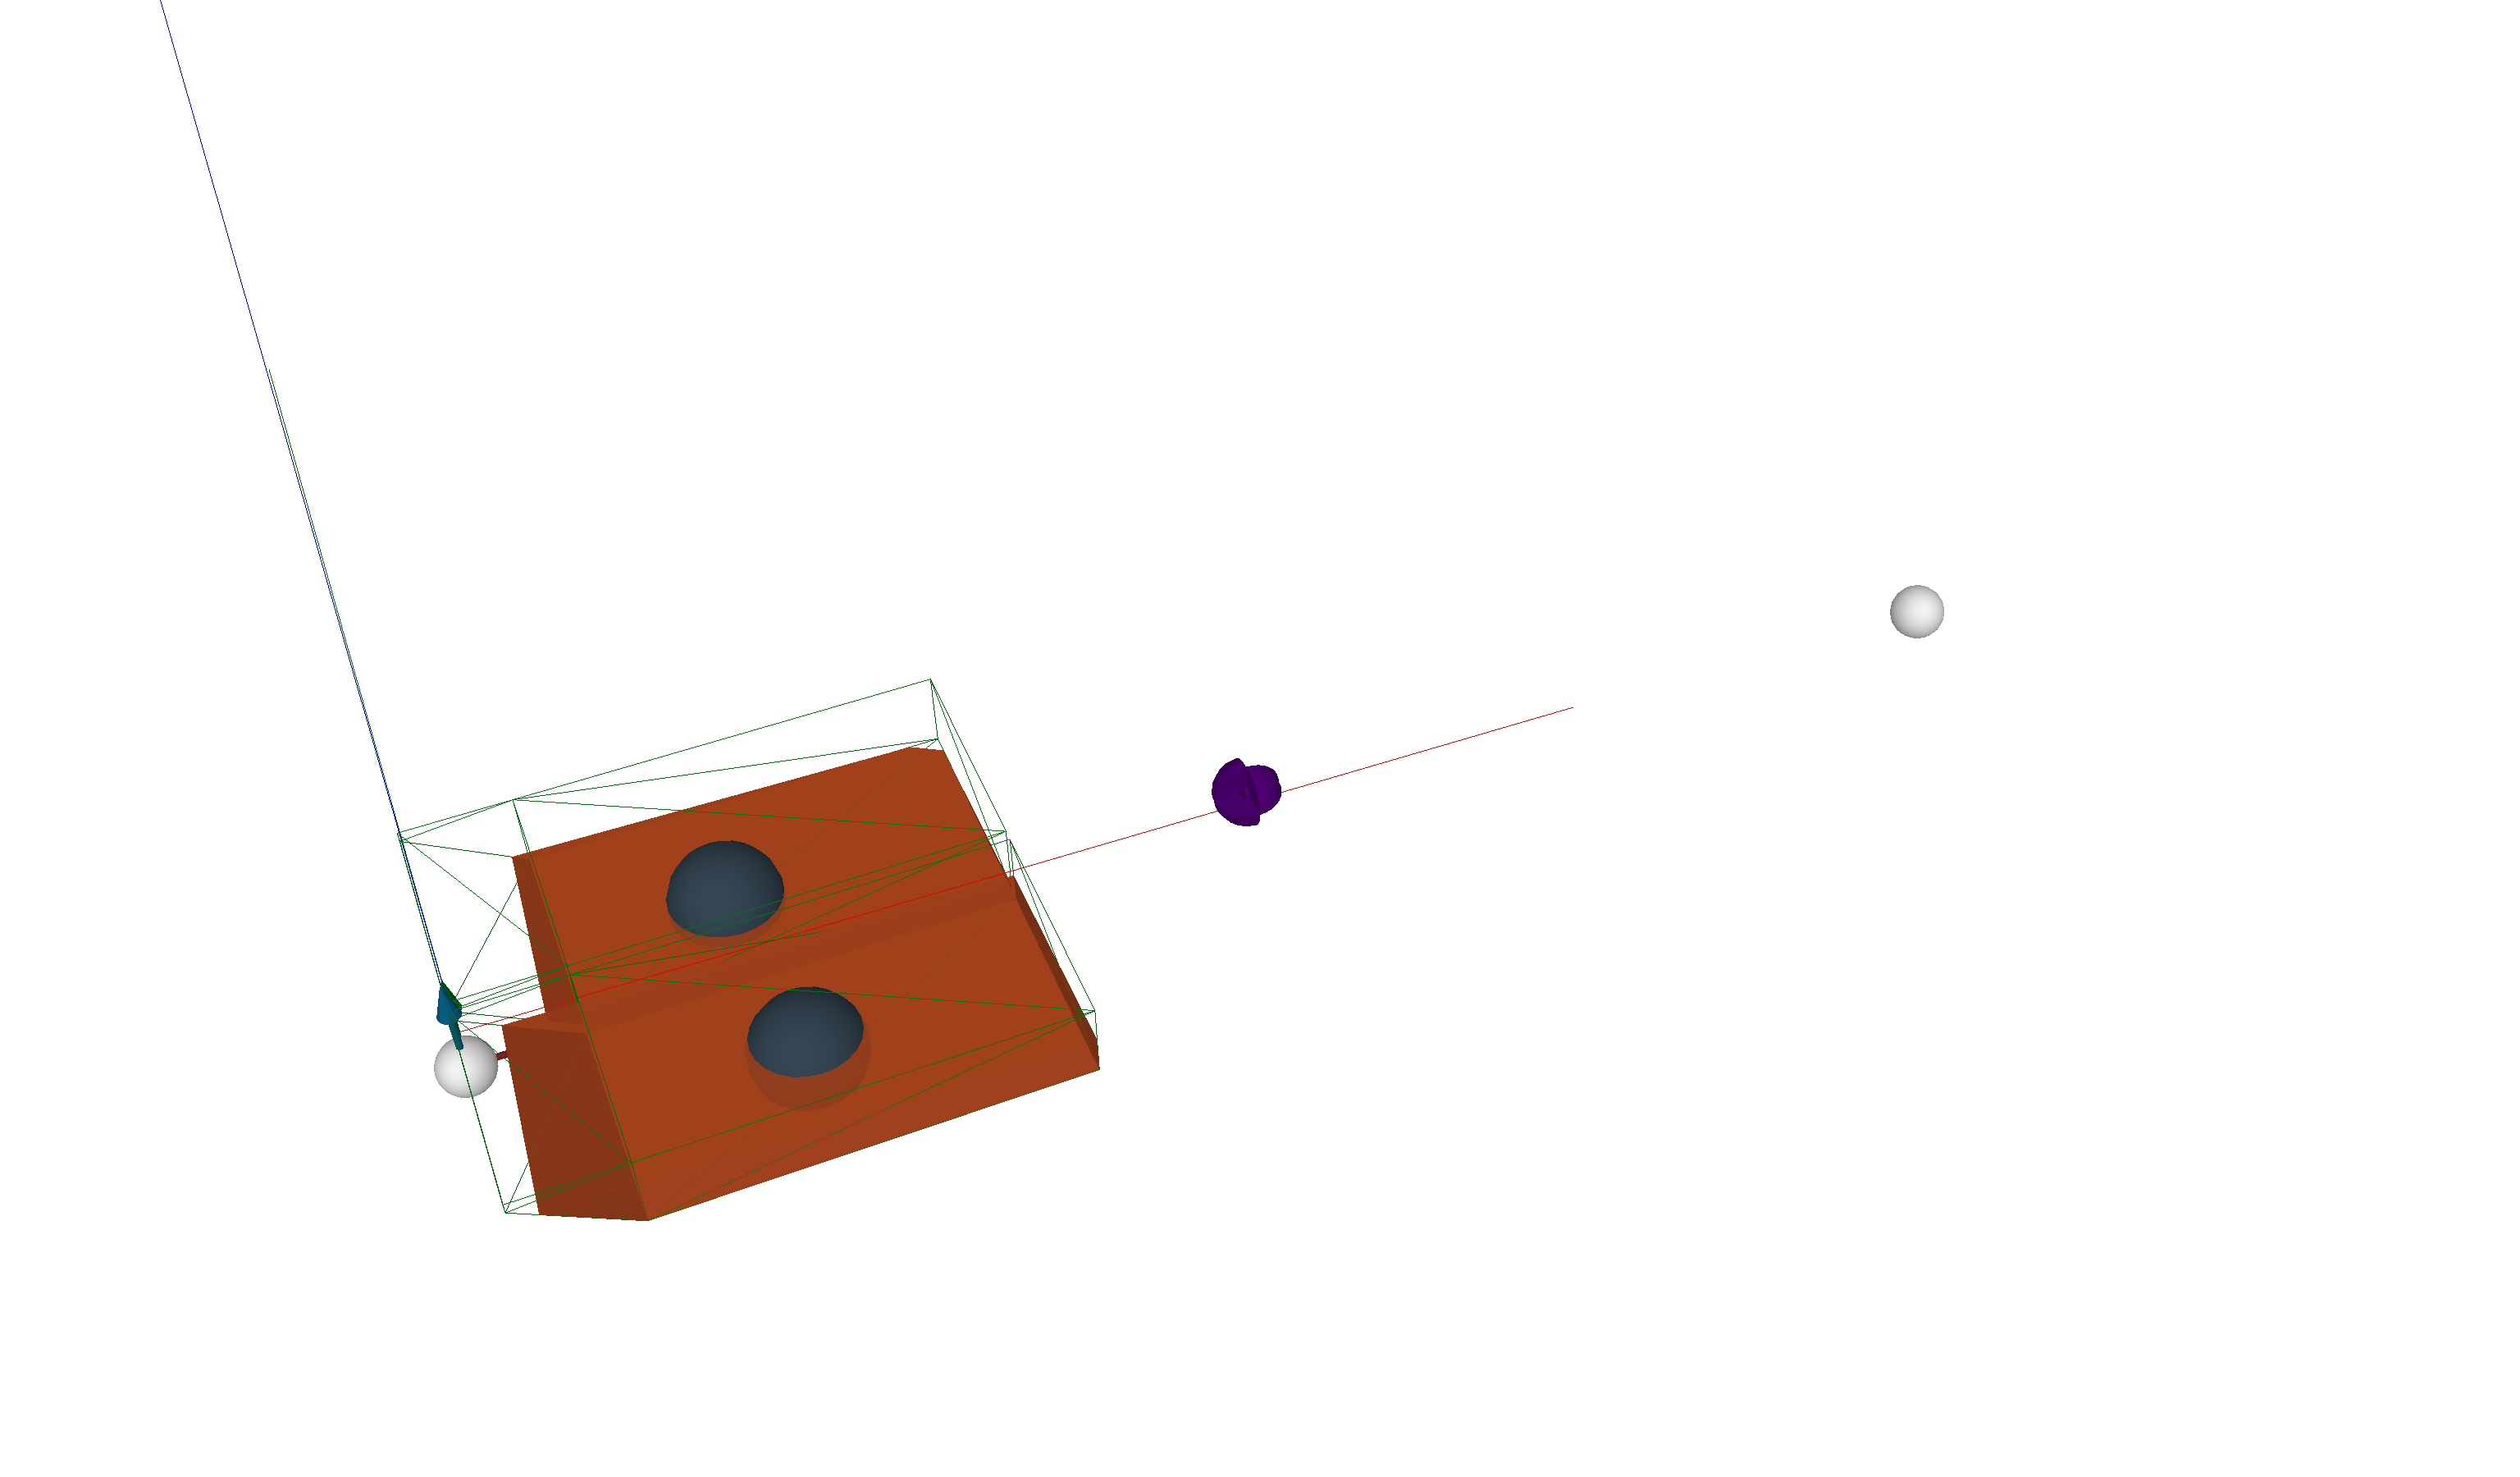

In [6]:
s['Buoyancy mesh'].visible = False
show(s, sea = False, camera_pos = (0.043895062013894315, -16.243569387411746, 16.65938089398565), lookat = (7.169258583546209, 0.5400134579295901, 0.17276009753098043), force_normalize = True, force_scale = 1.6, cog_scale = 0.3090056685321995)

# Compare results

Tank fillings:

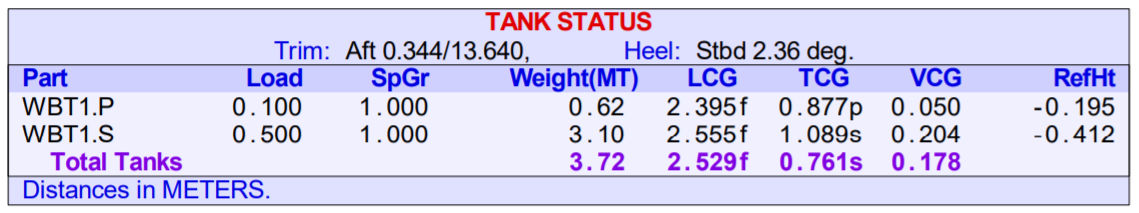

In [7]:
wbt1p = s['WBT1.P']
wbt1s = s['WBT1.S']


from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["What","DAVE","GHS"]

x.add_row(['WBT1.P Weight', f'{wbt1p.volume * wbt1p.density:.2f} mT', '0.62 mT'])
x.add_row(['WBT1.P LCG', f'{wbt1p.cog_local[0]:.3f}', '2.395'])
x.add_row(['WBT1.P TCG', f'{wbt1p.cog_local[1]:.3f}', '0.877'])
x.add_row(['WBT1.P VCG', f'{wbt1p.cog_local[2]:.3f}', '0.050'])

x.add_row(['WBT1.S Weight', f'{wbt1s.volume * wbt1s.density:.2f} mT', ' 3.10 mT'])
x.add_row(['WBT1.S LCG', f'{wbt1s.cog_local[0]:.3f}', '2.555'])
x.add_row(['WBT1.S TCG', f'{wbt1s.cog_local[1]:.3f}', '1.089'])
x.add_row(['WBT1.S VCG', f'{wbt1s.cog_local[2]:.3f}', '0.204'])

from IPython.core.display import HTML
HTML(x.get_html_string())

What,DAVE,GHS
WBT1.P Weight,0.62 mT,0.62 mT
WBT1.P LCG,2.401,2.395
WBT1.P TCG,0.879,0.877
WBT1.P VCG,0.051,0.050
WBT1.S Weight,3.10 mT,3.10 mT
WBT1.S LCG,2.558,2.555
WBT1.S TCG,-1.088,1.089
WBT1.S VCG,0.204,0.204


## Free floating condition

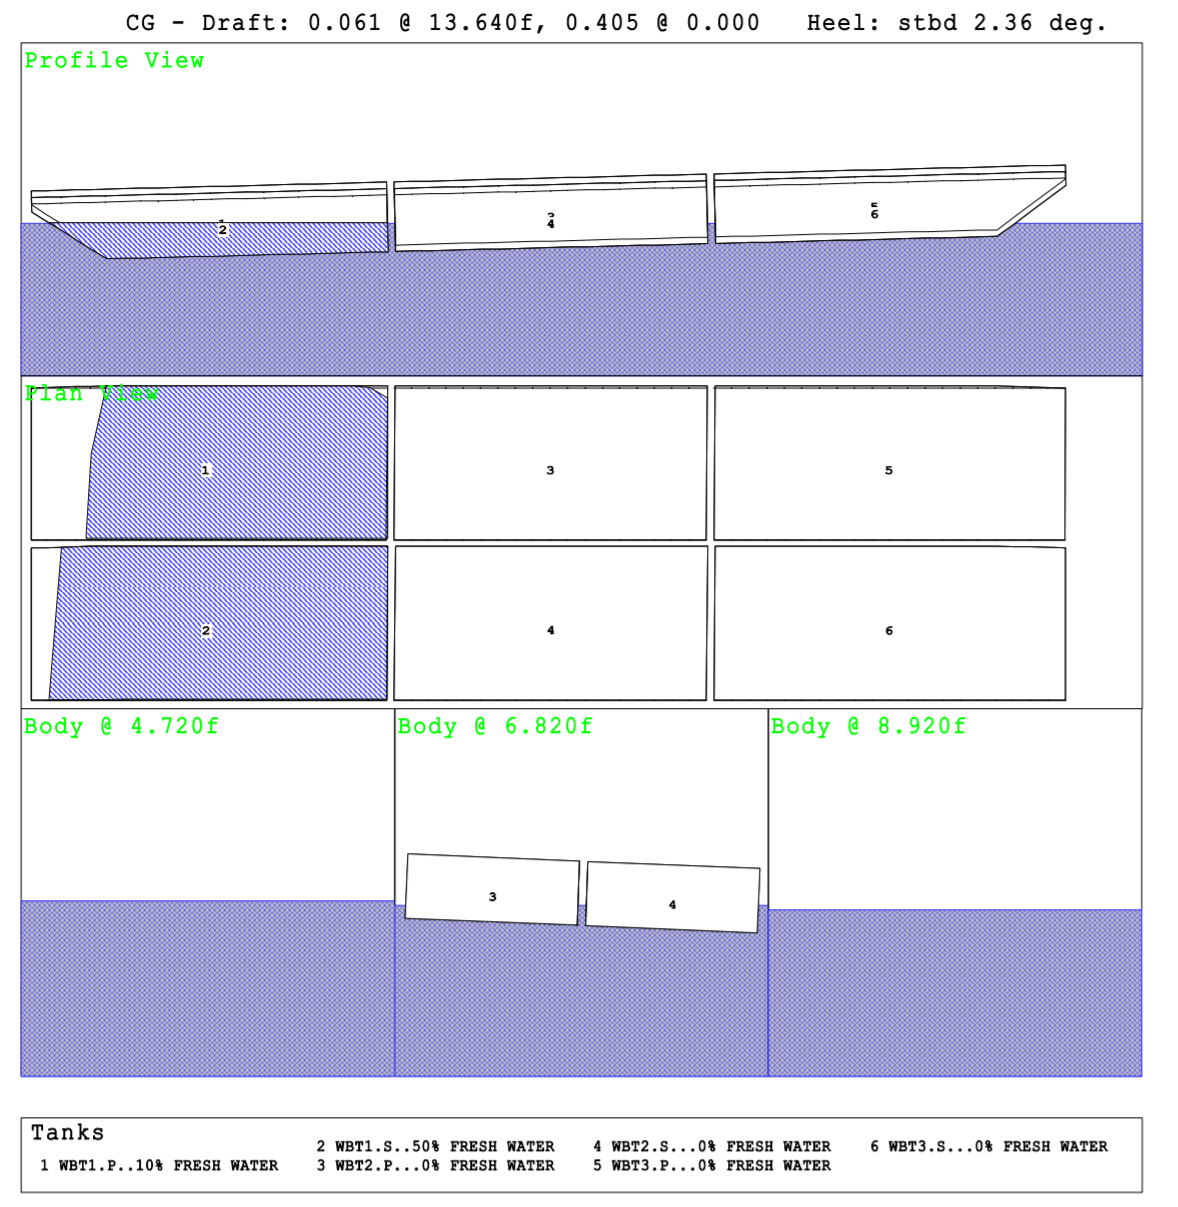

In [8]:
x = PrettyTable()

x.field_names = ["What","DAVE","GHS"]

x.add_row(['Heel [degrees]', f"{s['Nato Ponton'].heel:.3f}", '2.36'])
x.add_row(['Draft at 13.64 [m]', f"{s['bow'].gz:.3f}", '-0.061'])
x.add_row(['Draft at 0.000 [m]', f"{s['stern'].gz:.3f}", '-0.405'])

HTML(x.get_html_string())


What,DAVE,GHS
Heel [degrees],2.371,2.36
Draft at 13.64 [m],-0.062,-0.061
Draft at 0.000 [m],-0.404,-0.405


## Hydrostatic properties

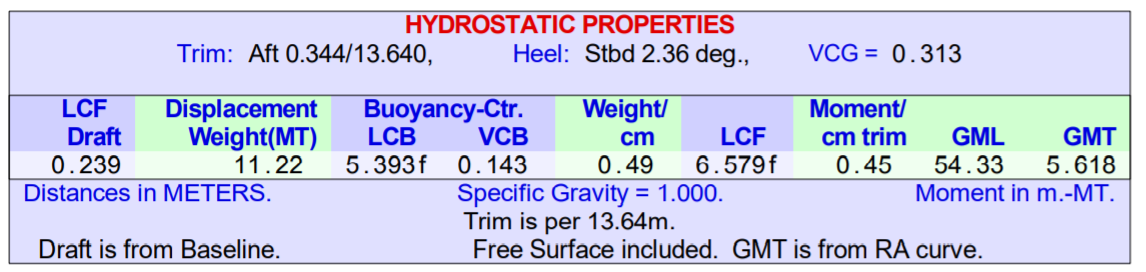

In [9]:
displacement_m3 = s['Buoyancy mesh'].displacement
cob_local = s['Buoyancy mesh'].cob_local
cob_global = s['Buoyancy mesh'].cob

In [10]:
x = PrettyTable()

x.field_names = ["What","DAVE","GHS"]
x.add_row(['Displacement [mT]', f"{displacement_m3:.2f}", '11.22'])
x.add_row(['LCB [m]', f"{cob_local[0]:.3f}", '5.393'])
x.add_row(['VCB [m]', f"{cob_local[2]:.3f}", '0.143'])

HTML(x.get_html_string())

What,DAVE,GHS
Displacement [mT],11.22,11.22
LCB [m],5.394,5.393
VCB [m],0.143,0.143


# Stability curves

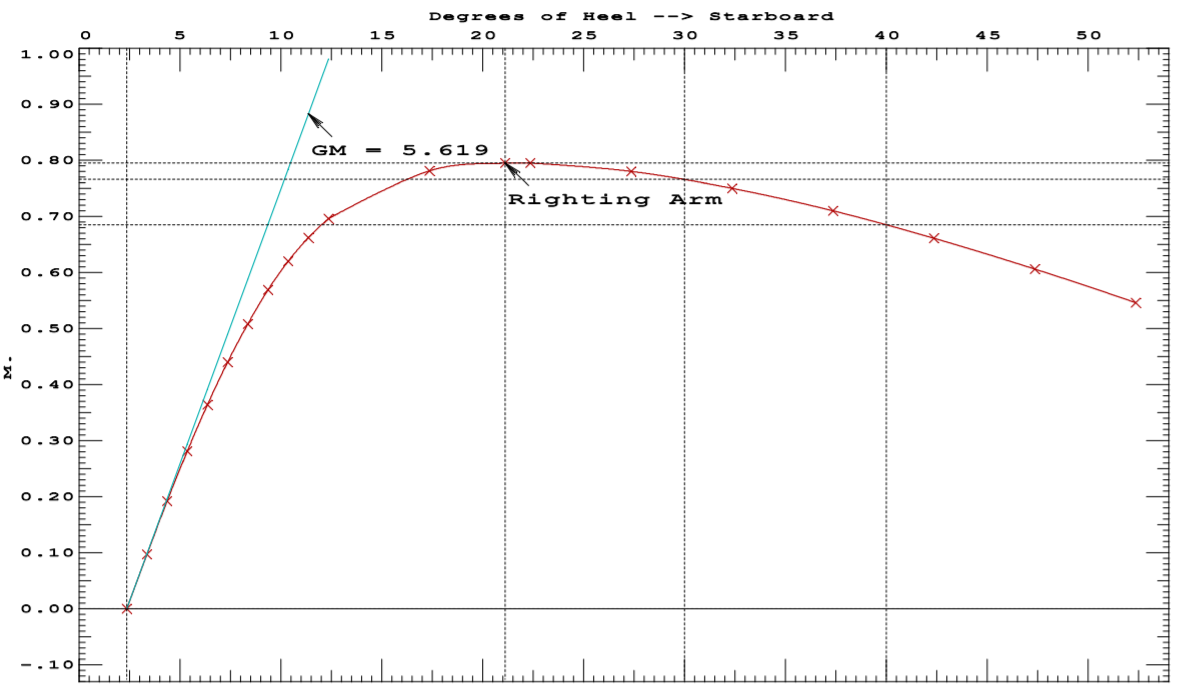

Solved to 1.0118640147993574e-08.


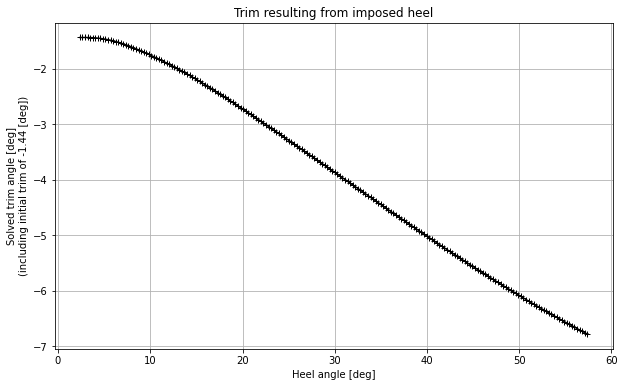

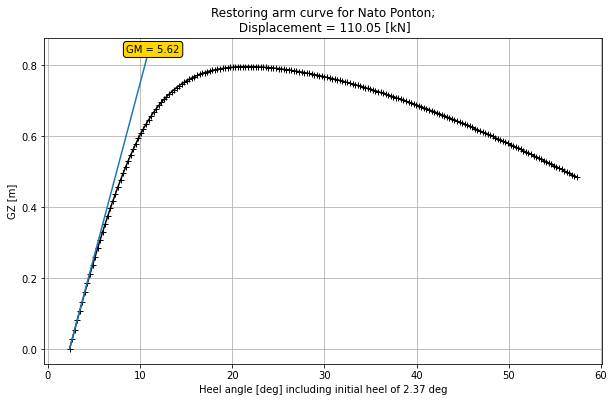

In [11]:
# Set matplotlib figure size
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]

from DAVE.marine import GZcurve_DisplacementDriven
GZcurve_DisplacementDriven(scene = s,
                    noshow = True,
                    vessel_node = "Nato Ponton",
                    displacement_kN=9.81*displacement_m3,
                    minimum_heel= 0,
                    maximum_heel=55,
                    steps=200,
                    teardown=True,
                    allow_surge=False,
                    allow_sway=False,
                    allow_yaw=False,
                    allow_trim=True);

# Note: DAVE derives the GM from the two points nearest to the equilibrium condition. 
# So the exact linearization depends on the number of points

Using paint to put the two pictures on top of eachother gives

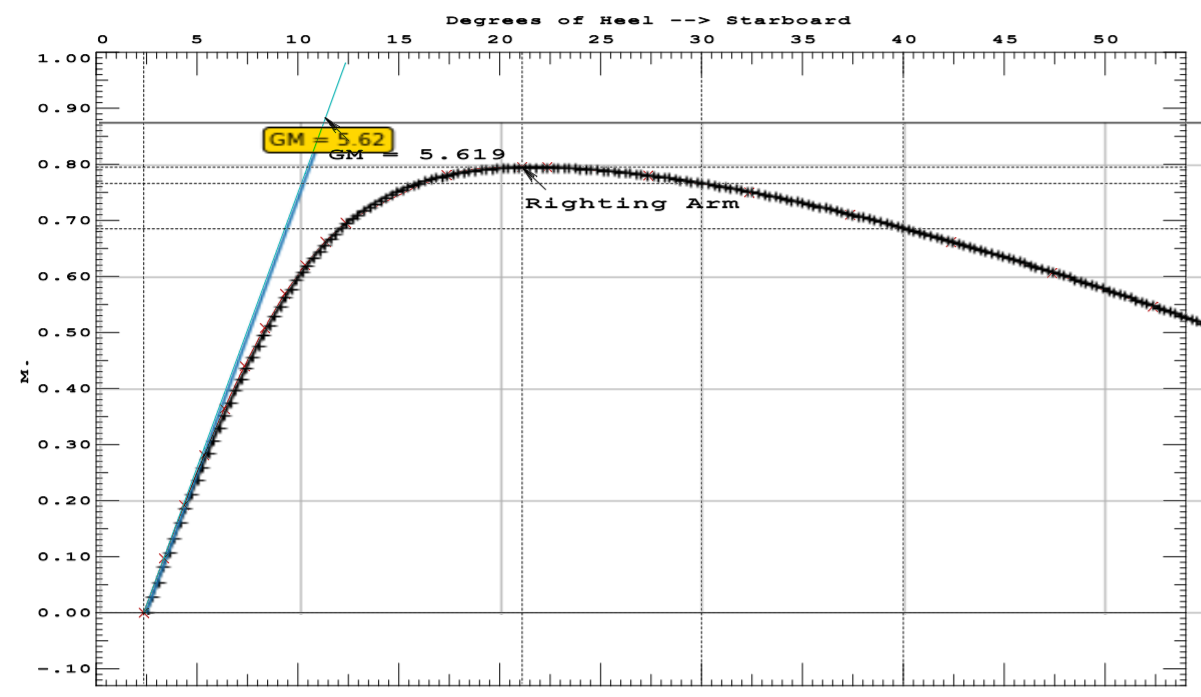